TASK 3 IMAGE CAPTIONING Combine computer vision and natural language processing to build an image captioning AI. Use pre-trained image recognition models like VGG or ResNet to extract features from images, and then use a recurrent neural network (RNN) or transformer-based model to generate captions for those images.

Saving Cristiano Ronaldo wallpaper by harrycool15 - Download on ZEDGE™ _ 9715.jpg to Cristiano Ronaldo wallpaper by harrycool15 - Download on ZEDGE™ _ 9715 (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
🖼️ Image: Cristiano Ronaldo wallpaper by harrycool15 - Download on ZEDGE™ _ 9715 (1).jpg
📝 Caption: a holding holding holding holding holding holding holding holding holding holding


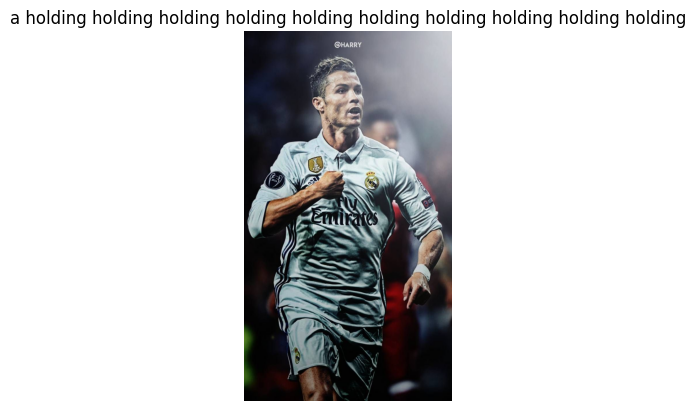

In [7]:
# Step 1: Install required packages (only needed in Colab)
!pip install tensorflow keras pillow matplotlib
# Step 2: Import Libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import resnet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Dropout
import matplotlib.pyplot as plt
from PIL import Image
# Step 3: Load and process the image
def load_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return resnet50.preprocess_input(img_array)

# Use ResNet50 to extract features
resnet_model = resnet50.ResNet50(weights='imagenet')
model_feat_extract = Model(inputs=resnet_model.input, outputs=resnet_model.get_layer("avg_pool").output)
# Step 4: Dummy tokenizer + captions (for demo)
# In real projects, use MSCOCO or Flickr8K datasets

tokenizer = Tokenizer()
tokenizer.fit_on_texts([
    'a man riding a horse on a beach',
    'a group of people walking on a street',
    'a dog jumping to catch a frisbee',
    'a woman holding an umbrella in the rain',
])

vocab_size = len(tokenizer.word_index) + 1
max_len = 10
# Step 5: Build Captioning Model (Basic LSTM)
embedding_dim = 50

image_input = Input(shape=(2048,))
img_dense = Dropout(0.5)(image_input)
img_dense = Dense(256, activation='relu')(img_dense)

caption_input = Input(shape=(max_len,))
caption_emb = Embedding(vocab_size, embedding_dim, mask_zero=True)(caption_input)
caption_lstm = LSTM(256)(caption_emb)

decoder = tf.keras.layers.add([img_dense, caption_lstm])
decoder = Dense(256, activation='relu')(decoder)
output = Dense(vocab_size, activation='softmax')(decoder)

caption_model = Model(inputs=[image_input, caption_input], outputs=output)
# Step 6: Dummy Prediction Logic (for demonstration only)
def generate_caption(img_path):
    img = load_image(img_path)
    feature = model_feat_extract.predict(img).reshape((1, 2048))
    input_text = 'a'

    for _ in range(max_len):
        sequence = tokenizer.texts_to_sequences([input_text])[0]
        sequence = pad_sequences([sequence], maxlen=max_len)
        y_pred = caption_model.predict([feature, sequence], verbose=0)
        next_word = tokenizer.index_word.get(np.argmax(y_pred[0]), None)
        if next_word is None:
            break
        input_text += ' ' + next_word
        if next_word == 'end':
            break
    return input_text

# Note: This is a dummy model with random predictions. For real captions,
# you need to train the model on a dataset like Flickr8k/MSCOCO.
# Step 7: Upload and Caption an Image
from google.colab import files
uploaded = files.upload()

for fname in uploaded.keys():
    caption = generate_caption(fname)
    print("🖼️ Image:", fname)
    print("📝 Caption:", caption)

    # Display Image
    img = Image.open(fname)
    plt.imshow(img)
    plt.axis('off')
    plt.title(caption)
    plt.show()
